In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
import pprint
import collections

In [326]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)
#### Use the following line before plt.plot(....) to increase the plot size ####
plt.figure(figsize=FIGSIZE)

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

Use the breast cancer data set to create a training set. Recall that the
label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. I compute the
base rate of malignant cancer occurrence over the entire data set.

In [327]:
breast_cancer_data = load_breast_cancer() # Load the breast_cancer_data from sklearn.datasets class.

In [328]:
# print(breast_cancer_data.target) # Inspect the target data. It indicates 0 for malignant cancer and 1 for benign cancer.
average_rate_of_malignant_cancer = 1 - np.mean(breast_cancer_data.target) # Invert the np.mean(breast_cancer_data.target) because it will then indicate average/probability of malignant cancer in the dataset.
print("The average rate of malignant cancer is ", average_rate_of_malignant_cancer, ". This means that we can make an initial estimate for the probability of malignant cancer of a single example is the same number.")

The average rate of malignant cancer is  0.37258347978910367 . This means that we can make an initial estimate for the probability of malignant cancer of a single example is the same number.


## Part 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, I can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
### (a)
(a) I will make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as I
search for an optimal `max_depth` parameter. I will vary the depth of the decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

In [329]:
# Inspect data
# print(breast_cancer_data.target) # Inspect the target data. It indicates 0 for malignant cancer and 1 for benign cancer.
# print(breast_cancer_data.data) # Inspect the data. This is the component/feature data.

# Initialize scores list for each depth
training_dataset_scores = []
cross_val_scores = []

for i in range(1,11): # Vary the max_depth parameter from 1 to 10
    classifier = tree.DecisionTreeClassifier(max_depth = i, random_state = 10)
    classifier.fit(breast_cancer_data.data, breast_cancer_data.target)
    # plt.figure(figsize=FIGSIZE)
    # tree.plot_tree(classifier) # vizualize the decision tree.
    # r = tree.export_text(classifier, feature_names = breast_cancer_data.feature_names)
    # print(r)
    ts = classifier.score(breast_cancer_data.data, breast_cancer_data.target) # gets average correctness score for training data features on given target data.
    training_dataset_scores.append(ts)
    # cv = cross_val_score(classifier, breast_cancer_data.data, breast_cancer_data.target, cv = 10)
    cv = cross_val_score(classifier, breast_cancer_data.data, breast_cancer_data.target, cv = KFold(n_splits=10,random_state=10,shuffle=True))
    cross_val_scores.append(np.mean(cv)) # get the mean of the cv list for each cv fold.

# Confirm if the 1.0 values you get from the training accuracy score is actually 1.0 (perfect accuracy) for the training set by checking the classifier.predict() on the breast_cancer_data.data.
classifier = tree.DecisionTreeClassifier(max_depth = 9, random_state = 10)
classifier.fit(breast_cancer_data.data, breast_cancer_data.target)
pred_vals = classifier.predict(breast_cancer_data.data)
print("Confirm if the 1.0 values you get from the training accuracy score is actually 1.0 (perfect accuracy) for the training set by checking the classifier.predict() on the breast_cancer_data.data: ", collections.Counter(pred_vals) == collections.Counter(breast_cancer_data.target)) # Checks if the predicted values from the predict function and the target data lists match exactly. Which it does.

print("Training set accuracy list at each depth level. ", training_dataset_scores) # Training set accuracy list at each depth level.
print("Cross-validation accuracy list at each depth level. ", cross_val_scores) # Cross-validation accuracy list at each depth level.
print("Highest accuracy of training set accuracy list. ", max(training_dataset_scores))
print("Highest accuracy of cross-validation accuracy list. ", max(cross_val_scores))
print("What is the index of the highest accuracy in the cross-validation list? ", cross_val_scores.index(max(cross_val_scores)), "This means that the best depth (highest accuracy) of the tree for cross-validation is: ", cross_val_scores.index(max(cross_val_scores))+1)

Confirm if the 1.0 values you get from the training accuracy score is actually 1.0 (perfect accuracy) for the training set by checking the classifier.predict() on the breast_cancer_data.data:  True
Training set accuracy list at each depth level.  [0.9226713532513181, 0.9420035149384886, 0.9789103690685413, 0.9824253075571178, 0.9947275922671354, 0.9982425307557118, 1.0, 1.0, 1.0, 1.0]
Cross-validation accuracy list at each depth level.  [0.8944235588972431, 0.9225563909774437, 0.919110275689223, 0.9208333333333334, 0.9243734335839597, 0.9225877192982456, 0.9243421052631579, 0.9225877192982456, 0.9208333333333332, 0.9208333333333332]
Highest accuracy of training set accuracy list.  1.0
Highest accuracy of cross-validation accuracy list.  0.9243734335839597
What is the index of the highest accuracy in the cross-validation list?  4 This means that the best depth (highest accuracy) of the tree for cross-validation is:  5


Text(0.5, 1.0, 'Figure 1. Decision tree classifier for malignant cancer detection.')

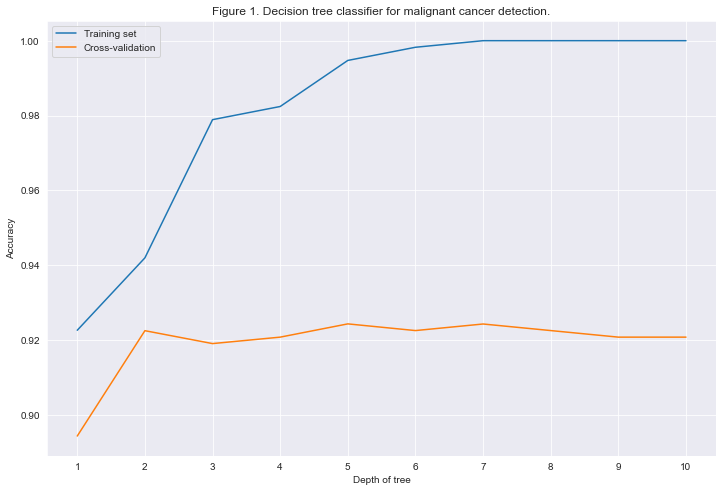

In [330]:
# Plot training and cross_validation accuracies at each depth to compare and contrast the accuracies at different depth levels.
plt.figure(figsize=FIGSIZE)
plt.plot(range(1, 11), training_dataset_scores, label = 'Training set')
plt.plot(range(1, 11), cross_val_scores, label = 'Cross-validation')
plt.legend()
plt.xticks(range(1,11))
plt.ylabel('Accuracy')
plt.xlabel('Depth of tree')
plt.title("Figure 1. Decision tree classifier for malignant cancer detection.")

### (b)

#### (i.)
**It seems as though the depths of 7, 8, 9, and 10 gave the best accuracy w.r.t. the full-dataset. All 4 depths predicted the full training set at perfect accuracy. max_depth = {7, 8, 9, 10}, random_state = 10 are the two parameters used for the best settings.**

#### (ii.)
**The depth of 5 gave the best accuracy w.r.t. the cross-validated dataset. To avoid overfitting the training set, the dataset was cross-validated (selects random values for the features in the dataset) and allows you to see the best model for predicting a sample with random values for features. max_depth = 5, random_state = 10 are the two parameters used for the best settings.**



## Part 3. Exploring random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.

### (a) 
For the first plot, I used a `ensemble.RandomForestClassifier` and the best depth
found in 2(b)ii as `max_depth`. I will now find the optimal setting of a second parameter,
n estimators. I varied the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
use 10 as your random seed for my classifier and cross-validation.

In [331]:
ensemble_accuracy = []

for i in range(1, 21):
    classifier = ensemble.RandomForestClassifier(n_estimators = i, max_depth = cross_val_scores.index(max(cross_val_scores))+1, random_state = 10)
    ensemble_scores = cross_val_score(classifier, breast_cancer_data.data, breast_cancer_data.target, cv = KFold(n_splits=10,random_state=10,shuffle=True))
    ensemble_accuracy.append(np.mean(ensemble_scores))

print("Cross-validation ensemble accuracy list at each number of estimators. ", ensemble_accuracy)
print("Highest accuracy of cross-validation ensemble with best number of estimators. ", max(ensemble_accuracy))
print("What is the index of the highest accuracy of the cross-validation ensemble number of estimators list? ", ensemble_accuracy.index(max(ensemble_accuracy)), "This means that the best number of estimators (highest accuracy) of the ensemble trees for cross-validation is: ", ensemble_accuracy.index(max(ensemble_accuracy))+1)

Cross-validation ensemble accuracy list at each number of estimators.  [0.9172932330827068, 0.9296679197994988, 0.9454260651629072, 0.9489348370927317, 0.9454260651629072, 0.950689223057644, 0.9471804511278193, 0.9419172932330826, 0.9489348370927319, 0.9454260651629072, 0.9401629072681704, 0.9489348370927317, 0.950689223057644, 0.9489035087719297, 0.9471804511278196, 0.9541979949874687, 0.950689223057644, 0.950689223057644, 0.9524436090225563, 0.950689223057644]
Highest accuracy of cross-validation ensemble with best number of estimators.  0.9541979949874687
What is the index of the highest accuracy of the cross-validation ensemble number of estimators list?  15 This means that the best number of estimators (highest accuracy) of the ensemble trees for cross-validation is:  16


Text(0.5, 1.0, 'Figure 2. Ensemble tree classifier with different number of estimators for malignant cancer detection.')

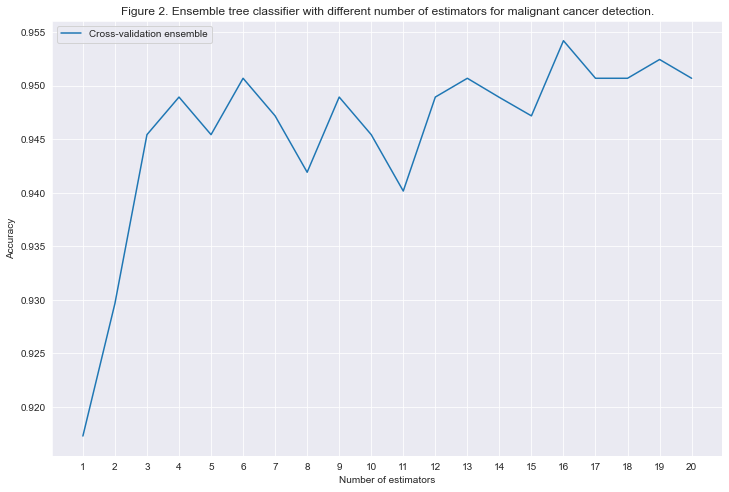

In [332]:
plt.figure(figsize = FIGSIZE)
plt.plot(range(1, 21), ensemble_accuracy, label = 'Cross-validation ensemble')
plt.legend()
plt.xticks(range(1,21))
plt.ylabel('Accuracy')
plt.xlabel('Number of estimators')
plt.title("Figure 2. Ensemble tree classifier with different number of estimators for malignant cancer detection.")

### (b) 
**There is an improvement using random forests versus using a single tree. The cv-accuracy in the single tree was 0.9172932330827068, while all other ensemble trees increased in accuracy.**

### (c) 
**The best settings of n_estimators were 16, which resulted in an accuracy of 0.9541979949874687.**

### (d) 
For the second plot, again I used a `ensemble.RandomForestClassifier`, but this time
I will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. This time, I only plotted the results
from cross-validation and not the full set, but the plot should be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10).

In [333]:
ensemble_cv_accuracy = []

for i in range(1, 11):
    classifier = ensemble.RandomForestClassifier(n_estimators = 16, max_depth = i, random_state = 10)
    ensemble_depth_scores = cross_val_score(classifier, breast_cancer_data.data, breast_cancer_data.target, cv = KFold(n_splits=10, random_state=10, shuffle=True))
    ensemble_cv_accuracy.append(np.mean(ensemble_depth_scores))

print("Cross-validation accuracy list at each depth level when n_estimators = 16. ", ensemble_cv_accuracy) # Cross-validation accuracy list at each depth level.
print("Highest accuracy of cross-validation accuracy list when n_estimators = 16. ", max(ensemble_cv_accuracy))
print("What is the index of the highest accuracy in the cross-validation list when n_estimators = 16? ", ensemble_cv_accuracy.index(max(ensemble_cv_accuracy)), "This means that the best depth (highest accuracy) of the tree for cross-validation is: ", ensemble_cv_accuracy.index(max(ensemble_cv_accuracy))+1)

Cross-validation accuracy list at each depth level when n_estimators = 16.  [0.9172619047619046, 0.9436716791979951, 0.9471491228070177, 0.9471177944862156, 0.9541979949874687, 0.9577067669172932, 0.9524436090225563, 0.9524436090225563, 0.9541979949874685, 0.9541979949874685]
Highest accuracy of cross-validation accuracy list when n_estimators = 16.  0.9577067669172932
What is the index of the highest accuracy in the cross-validation list when n_estimators = 16?  5 This means that the best depth (highest accuracy) of the tree for cross-validation is:  6


Text(0.5, 1.0, 'Figure 3. Ensemble tree classifier with increasing depth at the best n_estimators parameter value of 16 for malignant cancer detection.')

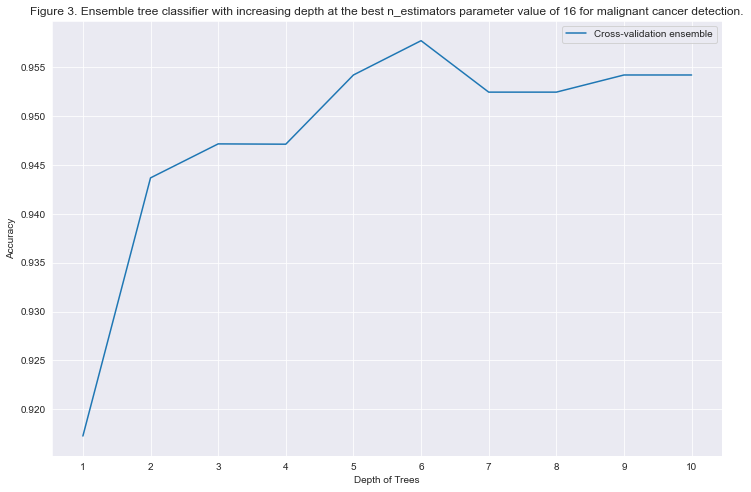

In [334]:
plt.figure(figsize = FIGSIZE)
plt.plot(range(1, 11), ensemble_cv_accuracy, label = 'Cross-validation ensemble')
plt.legend()
plt.xticks(range(1,11))
plt.ylabel('Accuracy')
plt.xlabel('Depth of Trees')
plt.title("Figure 3. Ensemble tree classifier with increasing depth at the best n_estimators parameter value of 16 for malignant cancer detection.")

### (e) 
**The new optimal setting of max_depth is 6 NOT the same 5 depth, as before, as it was before the n_estimators optimization.**

## Part 4. Exploring the dependability of our estimates.
### (a) 
Make a plot using the following procedure:
#### i. 
Using random state values from 0, 1, · · · , 99 I calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
#### ii.
Then I recorded the best max depth settings for each random state. Be sure to check whether multiple settings
achieve the best accuracy.

I plotted the counts for the best max depth settings as a bar chart with the max depth settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting).

In [335]:
random_state_accuracy = []

for i in range(100): # Vary the random_state from 0 to 99
    cross_val_rand_scores = []
    for j in range(1,11): # Vary the max_depth parameter from 1 to 10
        classifier = tree.DecisionTreeClassifier(max_depth = j, random_state = i)
        classifier.fit(breast_cancer_data.data, breast_cancer_data.target)
        cv = cross_val_score(classifier, breast_cancer_data.data, breast_cancer_data.target, cv = KFold(n_splits=10,random_state = i, shuffle = True))
        cross_val_rand_scores.append(np.mean(cv)) # get the mean of the cv list for each cv fold.
    best_indices = [index for index, item in enumerate(cross_val_rand_scores) if item == max(cross_val_rand_scores)]
    random_state_accuracy.append(best_indices)
random_state_accuracy = [item for items in random_state_accuracy for item in items]
random_state_accuracy = [item + 1 for item in random_state_accuracy]
# print(random_state_accuracy)

Text(0.5, 1.0, 'Figure 4. 100 random states max depth analysis.')

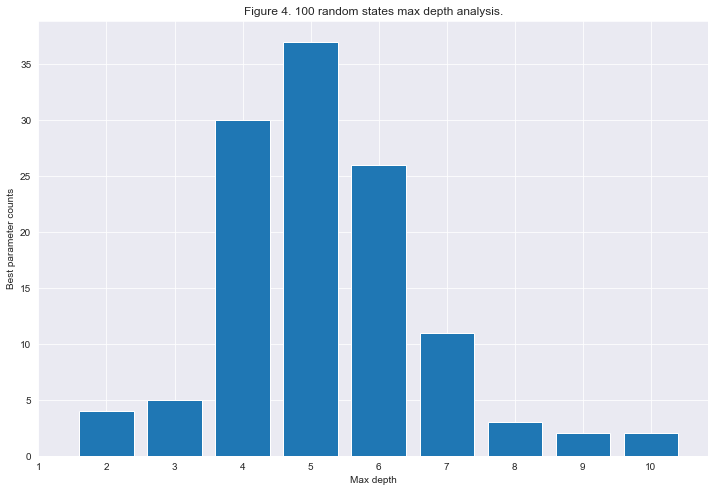

In [336]:
depth, counts = np.unique(random_state_accuracy, return_counts = True)
plt.figure(figsize = FIGSIZE)
plt.bar(depth, counts)
plt.xticks(range(1,11))
plt.ylabel('Best parameter counts')
plt.xlabel('Max depth')
plt.title("Figure 4. 100 random states max depth analysis.")